### OSMH:  Support Vector Machines

In [1]:
%matplotlib inline

import numpy as np
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import pylab as pl

"""
Demonstrates how a linearly nonseparable dataset in R^2 can be 
linearly separable in R^3 after a transformation via an appropriate
kernel function.

Generates a 2D non-separable dataset, and projects it to R^3 using
a polynomial kernel [x1, x2] -> [x1, x2, x1^2.0 + x2^2.0], where
it is now linearly separable in R^3.

Usage:
    $ python demo_data_transform.py
"""

def randrange(n, vmin, vmax):
    return (vmax-vmin)*np.random.rand(n) + vmin

def fn_kernel(x1, x2):
    """ Implements a polynomial kernel phi(x1,y1) = [x1, y1, x1^2 + y1^2] """
    return np.array([x1, x2, x1**2.0 + x2**2.0])

""" Generate linearly nonseparable dataset (in R^2) """
    
n = 1000

X, Y = make_circles(n_samples=n, noise=0.1, factor=0.4)

A = X[np.where(Y == 0)]
B = X[np.where(Y == 1)]

X0_orig = A[:, 0]
Y0_orig = A[:, 1]

X1_orig = B[:, 0]
Y1_orig = B[:, 1]

frac0 = len(np.where(Y == 0)[0]) / float(len(Y))
frac1 = len(np.where(Y == 1)[0]) / float(len(Y))

A = np.array([fn_kernel(x,y) for x,y in zip(np.ravel(X0_orig), np.ravel(Y0_orig))])
X0 = A[:, 0]
Y0 = A[:, 1]
Z0 = A[:, 2]

A = np.array([fn_kernel(x,y) for x,y in zip(np.ravel(X1_orig), np.ravel(Y1_orig))])
X1 = A[:, 0]
Y1 = A[:, 1]
Z1 = A[:, 2]

def plot_no_decision_boundary():    
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(121, projection='3d')

    ax.scatter(X0, Y0, Z0, c='r', marker='o')
    ax.scatter(X1, Y1, Z1, c='b', marker='^')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title("Data in R^3 (separable)")

    # Project data to X/Y plane
    ax2d = fig.add_subplot(122)
    ax2d.scatter(X0, Y0, c='r', marker='o')
    ax2d.scatter(X1, Y1, c='b', marker='^')

    ax2d.set_xlabel('X Label')
    ax2d.set_ylabel('Y Label')
    ax2d.set_title("Data projected to R^2 (nonseparable)")

    plt.show()

def plot_decision_boundary():
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(121, projection='3d')

    ax.scatter(X0, Y0, Z0, c='r', marker='o')
    ax.scatter(X1, Y1, Z1, c='b', marker='^')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title("Data in R^3 (separable w/ hyperplane)")

    x = np.arange(-1.25, 1.25, 0.1)
    y = np.arange(-1.25, 1.25, 0.1)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros(X.shape)
    Z[:,:] = 0.5

    ax.plot_surface(X, Y, Z, color='#FFFFFF')

    # Project data to X/Y plane
    ax2d = fig.add_subplot(122)
    ax2d.scatter(X0, Y0, c='r', marker='o')
    ax2d.scatter(X1, Y1, c='b', marker='^')

    ax2d.add_patch(pl.Circle((0,0), radius=sqrt(0.5),
                   fill=False, linestyle='solid', linewidth=4.0,
                   color='black'))
    ax2d.add_patch(pl.Circle((0,0), radius=sqrt(0.5),
                   fill=False, linestyle='dashed', linewidth=1.5,
                   color='#09F911'))
    
    ax2d.set_xlabel('X Label')
    ax2d.set_ylabel('Y Label')
    ax2d.set_title("Data projected to R^2 (hyperplane projection shown)")
    
    plt.ion()
    
    ax.view_init(azim = 210,elev = 5)
    plt.draw()

### SVM:  Example

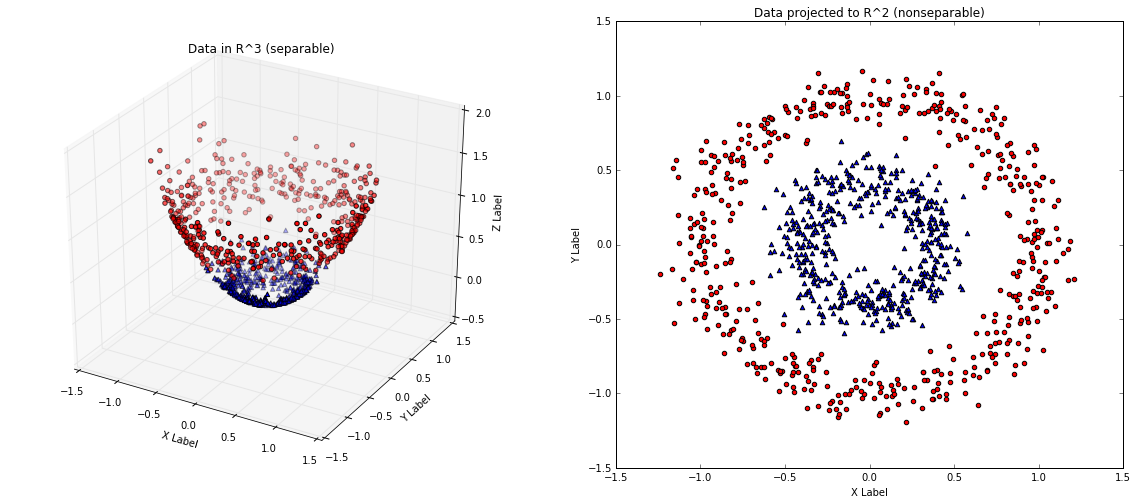

In [2]:
# Polynomial Kernel Example
plot_no_decision_boundary()

### SVM:  Decision Boundary

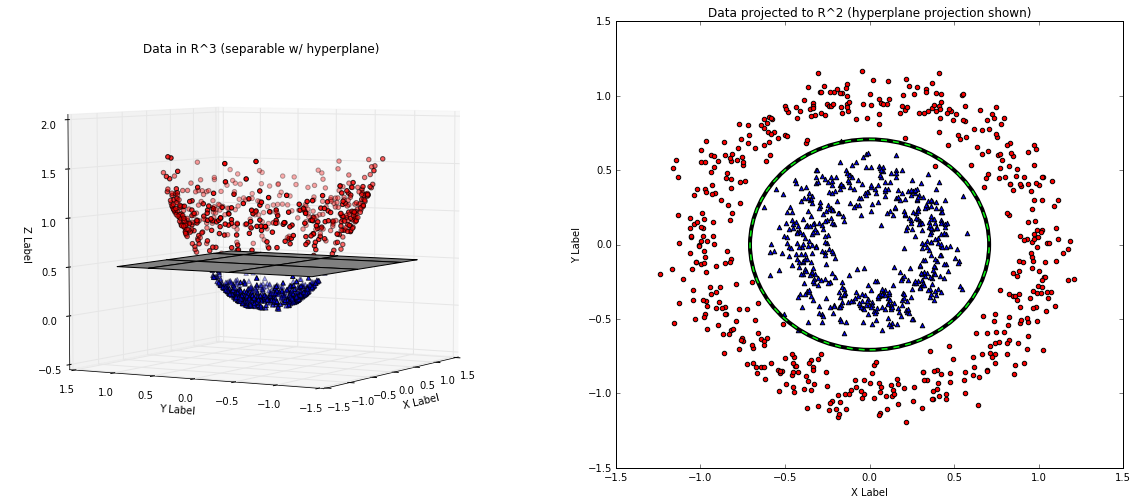

In [3]:
plot_decision_boundary()